# Sales analysis

### Import necessary libaries

In [5]:
import pandas as pd
import os

### Merging 12 months of sales data into single file

In [6]:
df = pd.read_csv(".\Sales_Data\Sales_April_2019.csv")

files = [file for file in os.listdir(".\Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])
    
all_months_data.to_csv("all_data.csv", index = False)

### Read in updated dataframe

In [7]:
all_data = pd.read_csv("./all_data.csv")

all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Augment data with additional colums

#### cleaning data from NaN 

In [8]:
nan_df = all_data[all_data.isnull().any(axis=1)]

all_data = all_data.dropna(how="all")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### find and delete "OR"

In [9]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]



#### convert column to right type

In [10]:
all_data["Quantity Ordered"] =pd.to_numeric(all_data["Quantity Ordered"]) # make int
all_data["Price Each"] =pd.to_numeric(all_data["Price Each"]) # make float
# did this because when I wannted create sales column i got error, as there where numbers writen as str and i couldn't multypli it

#### Creating month column

In [11]:
all_data["Month"] = all_data["Order Date"].str[0:2]

# coverting str to int 

all_data["Month"] = all_data["Month"].astype("int32")

#there was error that i cannot covert NaN to INT so i need to clean data first
#after cleaning data from NaN, next error war that there was "Or" so i need to find it and delete.

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Add sales column

In [12]:
all_data["Sales"] = all_data["Quantity Ordered"] * all_data["Price Each"]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


## What was the best month for sales? how much was earned that month?

#### best month fore sales was 12. month with income of  4.613.443.34$

In [13]:
results = all_data.groupby("Month")["Sales"].sum()


###########################################################
#monthly_sales = all_data.groupby("Month")["Sales"].sum()

#monthly_sales.head(12)

###########################################################

#month_with_highest_income = monthly_sales.idxmax()

#print(month_with_highest_income)



In [14]:
#highes_income = monthly_sales.max()

#print(highes_income)


### creating diagram using matplotlib

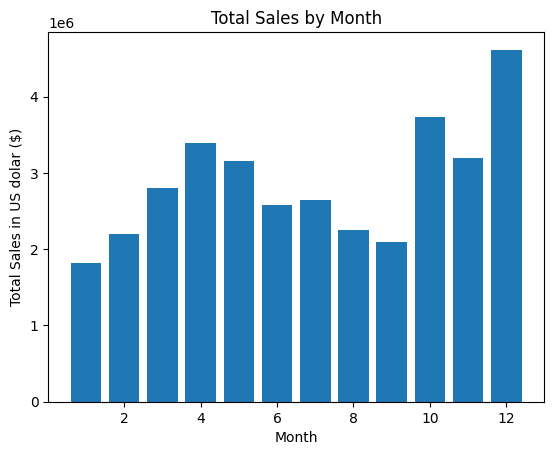

In [15]:

import matplotlib.pyplot as plt

months = range(1, 13)

plt.bar(months, results)
plt.xlabel("Month")
plt.ylabel("Total Sales in US dolar ($)")
plt.title("Total Sales by Month")
plt.show()

### 1: Add city column
#### 2: add city column with state

In [16]:
#City column
#all_data['City'] = all_data["Purchase Address"].str.split(",").str[1]
#all_data.head()

#city column with state

def get_city(address):
    return address.split (",") [1]

def get_state(address):
    return address.split (",") [2].split(" ")[1]

#all_data["City"] = all_data["Purchase Address"].apply(lambda x: get_city(x) + " (" + get_state(x) + ")") 
all_data["City"] = all_data["Purchase Address"].apply(lambda x:  f"{get_city(x)}  ({get_state(x)})") # sa zagradama (TX) ako zelim bez onda napisem kao 
                                                                                                     # i get_city
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### What city has best income in sales?
#### Answer is : San Francisco

In [18]:
city_results = all_data.groupby("City")["Sales"].sum()

city_results




City
 Atlanta  (GA)          2795498.58
 Austin  (TX)           1819581.75
 Boston  (MA)           3661642.01
 Dallas  (TX)           2767975.40
 Los Angeles  (CA)      5452570.80
 New York City  (NY)    4664317.43
 Portland  (ME)          449758.27
 Portland  (OR)         1870732.34
 San Francisco  (CA)    8262203.91
 Seattle  (WA)          2747755.48
Name: Sales, dtype: float64

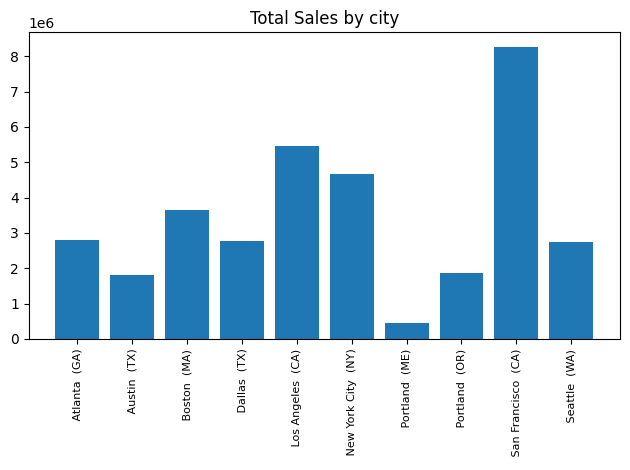

In [19]:
import matplotlib.pyplot as plt

cities = [city for city, df in city_results.groupby("City")]


plt.bar(cities, city_results) # horizontal
plt.title("Total Sales by city")
plt.xticks(cities, rotation="vertical", size = 8)  # Rotate x-labels for better visibility

plt.tight_layout()  # Adjust layout for better spacing
plt.show()